In [1]:
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
x1=np.random.randint(1,30,200000)
x2=np.random.randint(1,30,200000)

y=4+2*x1+3*x2+3*np.random.random(200000)

In [3]:
w=np.random.random(3)

In [4]:
x=pd.DataFrame({'const':np.ones(200000),'x1':x1,'x2':x2})

## Estimated paramter values from sklearn

In [5]:
lr=LinearRegression()
lr.fit(x.iloc[:,1:],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
w_sklearn=[lr.intercept_]+list(lr.coef_)
w_sklearn

[5.502064684880494, 1.9996705489877051, 3.000044598125013]

## Paramter Estimation with Gradient Descent

In [8]:
def mypred(features,weights):
    
    preds=np.dot(features,weights)
    return(preds)

In [10]:
mypred(x,w).shape

(200000,)

In [11]:
def myerror(target,features,weights):
    
    preds=mypred(features,weights)
    errors=target-preds
    return(errors)

In [12]:
myerror(y,x,w)

array([79.11668087, 67.64975801, 54.32772175, ..., 96.10577668,
       87.51436746, 34.63013683])

In [13]:
def mycost(target,features,weights):
    
    errors=myerror(target,features,weights)
    cost=np.dot(errors.T,errors)
    return(cost)

In [14]:
mycost(y,x,w)

933663126.4426987

In [15]:
def gradient(target,features,weights):
    
    errors=myerror(target,features,weights)
    grad=-np.dot(features.T,errors)/features.shape[0]
    return(grad)

In [16]:
gradient(y,x,w)

array([  -64.09478381, -1079.59939984, -1123.77478644])

In [17]:
def my_lr_gd(target,features,learning_rate,num_steps):
    
    weights=np.random.random(features.shape[1])
    cost=[]
    for i in range(num_steps):
        
        weights-=learning_rate*gradient(target,features,weights)
        
        
        cost.append(mycost(target,features,weights))
    return(cost,weights)

In [21]:
cost_gd,w_gd=my_lr_gd(y,x,.001,1000)

In [22]:
w_gd

array([1.50659621, 2.11469024, 3.1151623 ])

In [24]:
w_sklearn/w_gd

array([3.65198363, 0.9456092 , 0.963046  ])

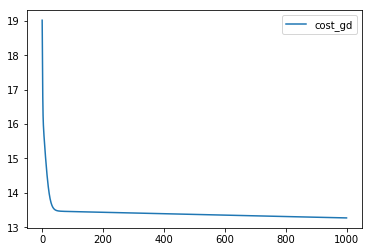

In [25]:
np.log(pd.DataFrame({'cost_gd':cost_gd})).plot()

In [26]:
def my_lr_sgd(target,features,learning_rate,num_steps):
    cost=[]
    weights=np.random.random(features.shape[1])
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        weights -= learning_rate*gradient(target_sub,features_sub,weights)
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [27]:
cost_sgd,w_sgd=my_lr_sgd(y,x,.001,1000)

In [28]:
w_sgd

array([1.60711601, 2.11436512, 3.11102901])

In [29]:
w_sklearn/w_sgd

array([3.4235641 , 0.94575461, 0.9643255 ])

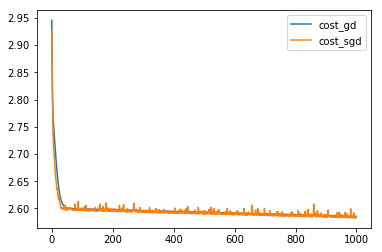

In [30]:
np.log(pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd)})).plot()

In [31]:
def my_lr_mom(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    vw=np.zeros(features.shape[1])
    beta=0.9
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        vw=beta*vw+(1-beta)*gradient(target_sub,features_sub,weights)
        
        vw_a=vw/(1-beta**(i+1))
        
        weights -= learning_rate*vw_a
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [32]:
cost_mom,w_mom=my_lr_mom(y,x,.01,1000)

In [33]:
w_mom

array([3.5294127 , 2.05170695, 3.08243469])

In [34]:
w_sklearn/w_mom

array([1.55891791, 0.97463751, 0.9732711 ])

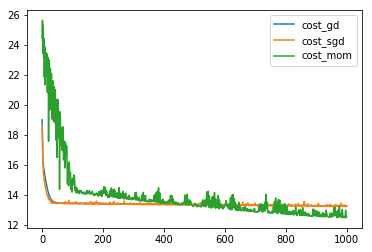

In [35]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom})).plot()

In [36]:
def my_lr_rms(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    sw=np.zeros(features.shape[1])
    
    beta=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        sw=beta*sw+(1-beta)*(gd**2)
        
        sw_a=sw/(1-beta**(i+1))
        
        weights -= learning_rate*(gd/(np.sqrt(sw_a)+1e-15))
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [37]:
cost_rms,w_rms=my_lr_rms(y,x,.1,1000)

In [38]:
w_rms

array([5.2822809 , 2.00415401, 2.9983603 ])

In [39]:
w_sklearn/w_rms

array([1.04160774, 0.99776292, 1.00056174])

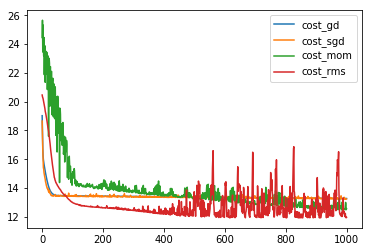

In [40]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms})).plot()

In [41]:
def my_lr_adam(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    sw=np.zeros(features.shape[1])
    vw=np.zeros(features.shape[1])
    beta1=0.9
    beta2=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        vw=beta1*vw+(1-beta1)*gd
        sw=beta2*sw+(1-beta2)*(gd**2)
        
        vw_a=vw/(1-beta1**(i+1))
        sw_a=sw/(1-beta2**(i+1))
        
        weights -= learning_rate*(vw_a/(np.sqrt(sw_a)+1e-15))
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [42]:
cost_adam,w_adam=my_lr_adam(y,x,.1,1000)

In [43]:
w_adam

array([5.36307049, 1.99042515, 2.9906794 ])

In [44]:
w_sklearn/w_adam

array([1.02591691, 1.00464494, 1.00313146])

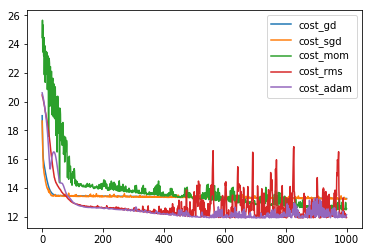

In [45]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms,'cost_adam':cost_adam})).plot()